# График рассеяния на аггрегированном датасете (возможности анимации)

In [1]:
# наша основная библиотека для визуализаций
import matplotlib.pyplot as plt  
import pandas as pd 
import numpy as np

# магическая функция, чтобы графики отображались в блокноте под ячейками
%matplotlib inline  

Следующий небольшой пример сделаем на датасете проекта gapminder - это набор социо-экономических индикаторов для ряда стран за 200 лет. Мы возьмем небольшой срез набора данных с 1957 года с шагом пять лет и две переменные - ВВП на душу населения (gdp per capita) и продолжительность жизни.

www.gapminder.org

In [2]:
gapminder = pd.read_csv('gapminderData.csv')
gapminder.head()

,country,year,pop,continent,lifeExp,gdpPercap
0,Afghanistan,1952,8425333.0,Asia,28.801,779.445314
1,Afghanistan,1957,9240934.0,Asia,30.332,820.853030
2,Afghanistan,1962,10267083.0,Asia,31.997,853.100710
3,Afghanistan,1967,11537966.0,Asia,34.020,836.197138
4,Afghanistan,1972,13079460.0,Asia,36.088,739.981106


In [3]:
gapminder.shape

(1704, 6)

In [4]:
gapminder.year.values  # смотрим, какие значения есть в колонке год

array([1952, 1957, 1962, ..., 1997, 2002, 2007])

In [6]:
len(set(gapminder.year.values))

12

In [7]:
gapminder.describe()

,year,pop,lifeExp,gdpPercap
count,1704.00000,1.704000e+03,1704.000000,1704.000000
mean,1979.50000,2.960121e+07,59.474439,7215.327081
std,17.26533,1.061579e+08,12.917107,9857.454543
min,1952.00000,6.001100e+04,23.599000,241.165876
25%,1965.75000,2.793664e+06,48.198000,1202.060309
50%,1979.50000,7.023596e+06,60.712500,3531.846988
75%,1993.25000,1.958522e+07,70.845500,9325.462346
max,2007.00000,1.318683e+09,82.603000,113523.132900


Сделаем колонку continent категориальной.

In [9]:
set(gapminder.continent)

{'Africa', 'Americas', 'Asia', 'Europe', 'Oceania'}

In [10]:
gapminder['continent'] = pd.Categorical(gapminder['continent'])

In [12]:
gapminder['continent'][:5]

0    Asia
1    Asia
2    Asia
3    Asia
4    Asia
Name: continent, dtype: category
Categories (5, object): ['Africa', 'Americas', 'Asia', 'Europe', 'Oceania']

In [11]:
gapminder['continent'].cat.codes  # теперь у нас есть такая числовая разметка категорий, которую мы сможем скормить переменной графика

0       2
1       2
2       2
3       2
4       2
       ..
1699    0
1700    0
1701    0
1702    0
1703    0
Length: 1704, dtype: int8

In [13]:
gapminder.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1704 entries, 0 to 1703
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   country    1704 non-null   object  
 1   year       1704 non-null   int64   
 2   pop        1704 non-null   float64 
 3   continent  1704 non-null   category
 4   lifeExp    1704 non-null   float64 
 5   gdpPercap  1704 non-null   float64 
dtypes: category(1), float64(3), int64(1), object(1)
memory usage: 68.6+ KB


In [15]:
gapminder['continent'].cat.categories

Index(['Africa', 'Americas', 'Asia', 'Europe', 'Oceania'], dtype='object')

In [16]:
gapminder['continent'].cat.codes

0       2
1       2
2       2
3       2
4       2
       ..
1699    0
1700    0
1701    0
1702    0
1703    0
Length: 1704, dtype: int8

In [14]:
d = dict(enumerate(gapminder['continent'].cat.categories))
print(d)

{0: 'Africa', 1: 'Americas', 2: 'Asia', 3: 'Europe', 4: 'Oceania'}


In [8]:
gapminder['continent'].unique()

['Asia', 'Europe', 'Africa', 'Americas', 'Oceania']
Categories (5, object): ['Africa', 'Americas', 'Asia', 'Europe', 'Oceania']

Еще мы с вами будем хотеть логарифмировать переменную gpd. Многие переменные, связанные, например, с доходом имеют логарифмическое распределение (что логично - у нас очень много людей или стран с каким-то небольшим достатком и есть очень длинный хвост наблюдений с большими значениями по шкале).


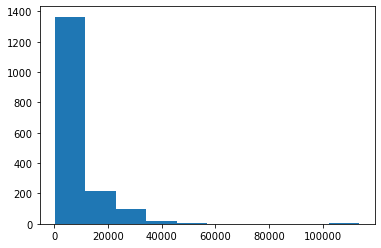

In [9]:
plt.hist(gapminder['gdpPercap']);

C логарифмированием шкалы мы избавимся от длинного хвоста (ниже посмотрим, как это влияент на график.)
Насчет логарифмированных шкал нужно волноваться в статистических моделях, потому что от этого у вас поменяется интерпретация коэффицентов. Сейчас нам достаточно понимать, что у стран, находящихся правее по шкале - ВВП на душу населения выше.

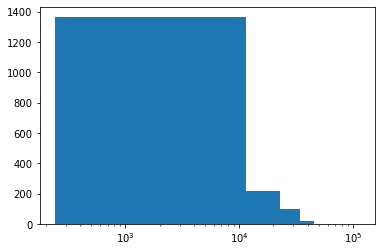

In [10]:
plt.hist(gapminder['gdpPercap'])
plt.xscale('log')

## Упражнение
Сейчас в наборе данных у нас есть каждая страна в каждый год с 1952 по 2007.
Давайте сделаем срез для 1952 года и попробуем построить график рассения (почти то же самое, что делали выше):

* x - доход
* y - продолжительность жизни
* размер - население
* цвет - континент

Подпишем шкалы x и y.


**Пример без лог-преобразования шкалы x**

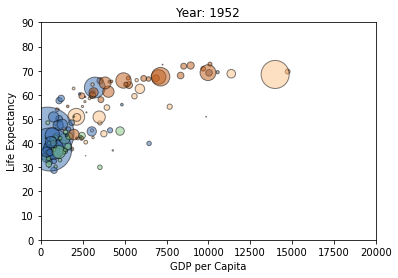

In [19]:
tmp = gapminder[gapminder.year == 1952]

plt.scatter(tmp['gdpPercap'], tmp['lifeExp'], s = tmp['pop']/200000, 
            c=tmp['continent'].cat.codes, cmap= "Accent", alpha=0.5, 
            edgecolors="black", linewidth=1) # добавили два новых аргумента - цвет и обводка границ точек.

plt.xlabel("GDP per Capita")
plt.ylabel("Life Expectancy")
plt.title("Year: "+str(1952))  # заголовок графика
plt.ylim(0, 90)  # давайте еще добавим лимиты шкал, чтобы шкала не менялась, когда мы будем строить графики для других годов
plt.xlim(0,20000);

**То же самое, но с лог-преобразованием**

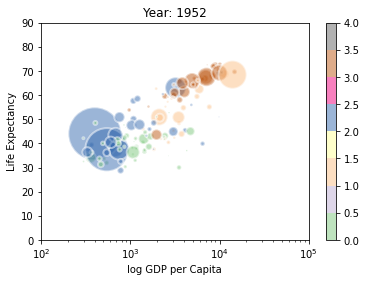

In [20]:
tmp = gapminder[gapminder.year == 1952]
plt.scatter(tmp['gdpPercap'],
            tmp['lifeExp'],
            s=tmp['pop'] / 200000,
            c=tmp['continent'].cat.codes,
            cmap="Accent",
            alpha=0.5,
            edgecolors="white",
            linewidth=2)
plt.xscale('log')
plt.xlabel("log GDP per Capita")
plt.ylabel("Life Expectancy")
plt.title("Year: " + str(1952))
plt.ylim(0, 90)
plt.xlim(100, 100000);# меняем лимиты для лог-шкалы
plt.colorbar()

А теперь давайте автоматизируем эту красоту, чтобы получить график для каждой пятилетки с 1952 до 2007. Потом при желании мы можем их собрать в gif в какой-нибудь программе и получить анимированный график.

In [13]:
gapminder['year'].unique()

array([1952, 1957, 1962, 1967, 1972, 1977, 1982, 1987, 1992, 1997, 2002,
       2007])

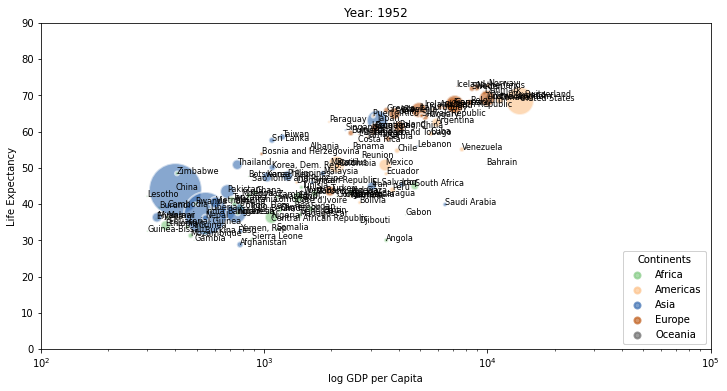

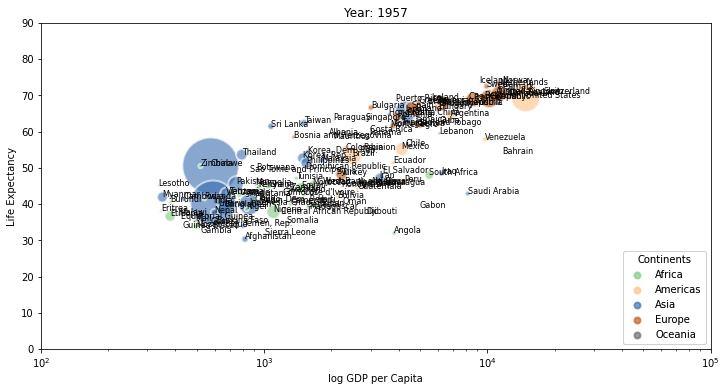

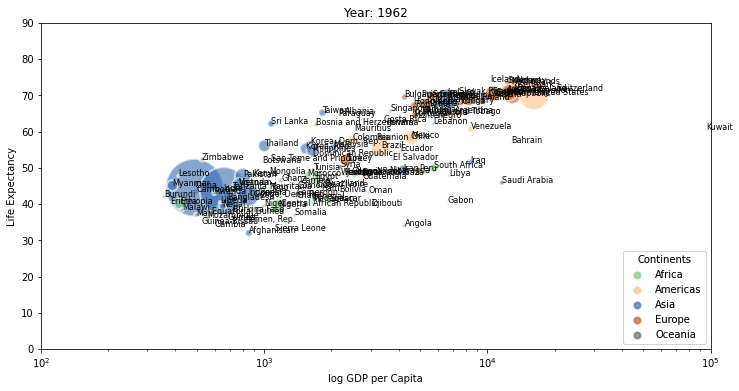

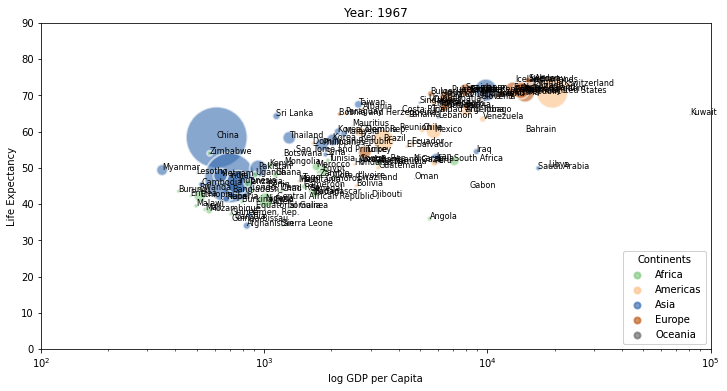

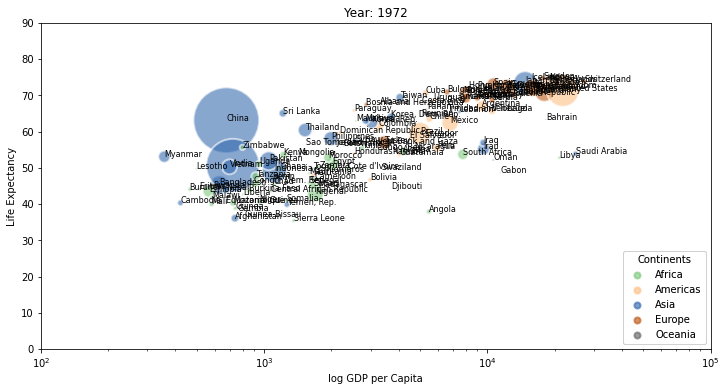

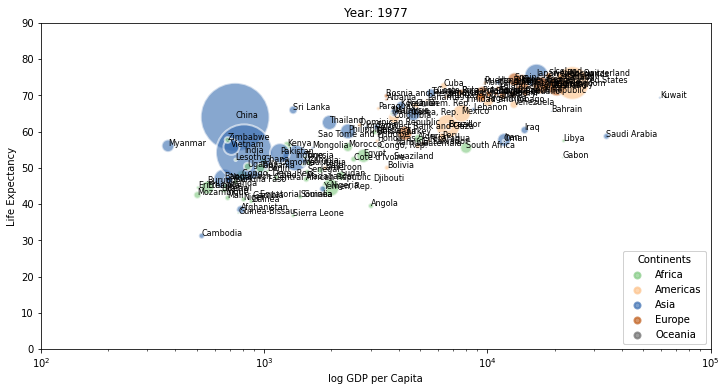

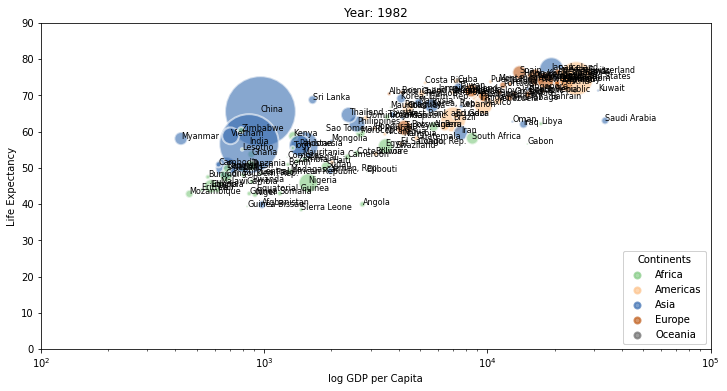

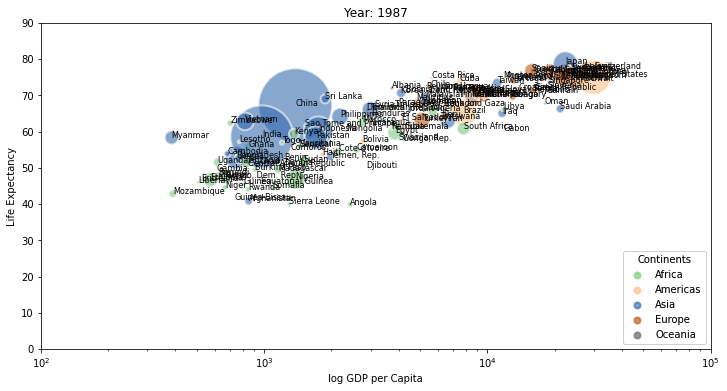

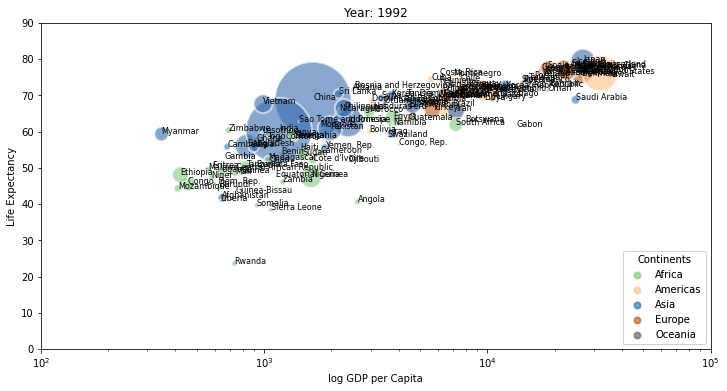

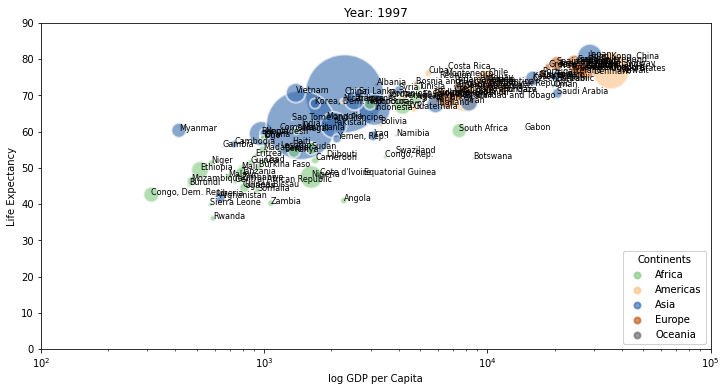

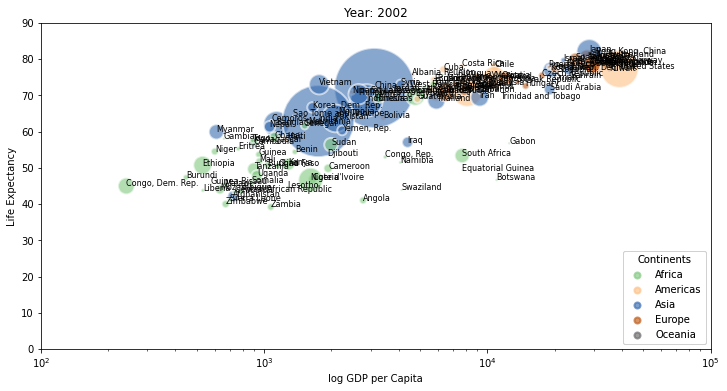

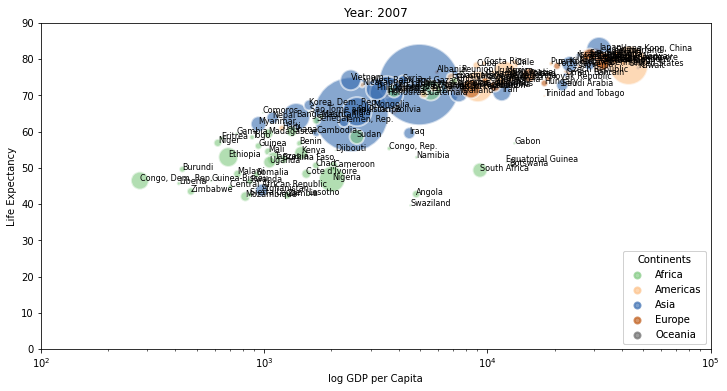

In [38]:
for i in gapminder.year.unique(): # пишем цикл, который проходит по всем уникальным значениям в колонке год
 
    # создаем фигуру
    fig, ax = plt.subplots(figsize=(12, 6))
    tmp = gapminder[gapminder.year == i]  # создаем срез датафрейма для года на данной итерации
    tmp = tmp.reset_index(drop = True)
    scatter = ax.scatter(tmp['gdpPercap'], 
                         tmp['lifeExp'], 
                         s=tmp['pop']/200000 , 
                c=tmp['continent'].cat.codes, 
                         cmap="Accent", 
                         alpha=0.6, edgecolors="white", linewidth=2)
    
    plt.xscale('log')
    plt.xlabel("log GDP per Capita")
    plt.ylabel("Life Expectancy")
    plt.title("Year: "+str(i))
    plt.ylim(0, 90)
    plt.xlim(100,100000)
    
    handles = scatter.legend_elements(num=[0,1,2,3,4])[0]
    
    legend = ax.legend(handles=handles, labels=d.values(),
                    loc="lower right", title="Continents")
    ax.add_artist(legend)
    
    for i, country in enumerate(tmp['country']):  
        ax.annotate(
            country, (tmp['gdpPercap'][i], tmp['lifeExp'][i]), fontsize=8
        )

#     for i, country in enumerate(tmp['country']):
#         print(i, country)
    

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

# Создаем функцию для анимации
def update(frame):
    ax.clear()
    
    tmp = gapminder[gapminder.year == frame]
    tmp = tmp.reset_index(drop=True)
    
    scatter = ax.scatter(tmp['gdpPercap'], 
                         tmp['lifeExp'], 
                         s=tmp['pop']/200000 , 
                         c=tmp['continent'].cat.codes, 
                         cmap="Accent", 
                         alpha=0.6, edgecolors="white", linewidth=2)
    
    ax.set_xscale('log')
    ax.set_xlabel("log GDP per Capita")
    ax.set_ylabel("Life Expectancy")
    ax.set_title("Year: " + str(frame))
    ax.set_ylim(0, 90)
    ax.set_xlim(100, 100000)
    
    handles = scatter.legend_elements(num=[0, 1, 2, 3, 4])[0]
    
    legend = ax.legend(handles=handles, labels=d.values(),
                       loc="lower right", title="Continents")
    ax.add_artist(legend)
    
    for i, country in enumerate(tmp['country']):
        ax.annotate(country, (tmp['gdpPercap'][i], tmp['lifeExp'][i]), fontsize=5)

# Создаем фигуру
fig, ax = plt.subplots(figsize=(12, 6))

# Создаем анимацию
animation = FuncAnimation(fig, update, frames=gapminder.year.unique(), interval=500)

# Сохраняем анимацию в формате GIF
animation.save('gapminder_animation.gif', writer='pillow')
